C:\Users\rajav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


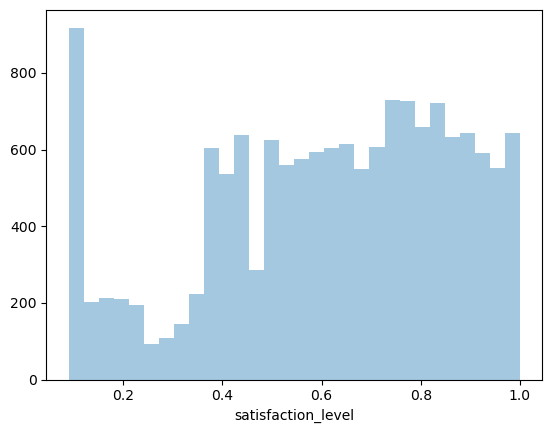

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the HR data
hr_data = pd.read_csv('hr_data.csv')

# plot the distribution of satisfaction level
sns.distplot(hr_data['satisfaction_level'], kde=False)
plt.show()



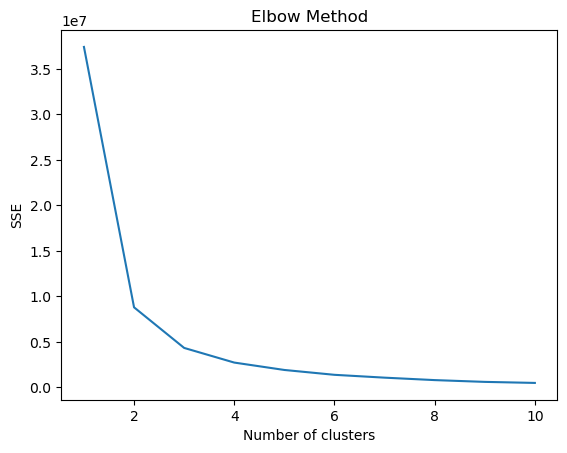

KMeans Clustering - Churn Rate:
KMeans_cluster
0    0.293091
1    0.331701
2    0.060523
Name: left, dtype: float64

Agglomerative Clustering - Churn Rate:
Agg_cluster
0    0.244773
1    0.342869
2    0.085094
Name: left, dtype: float64


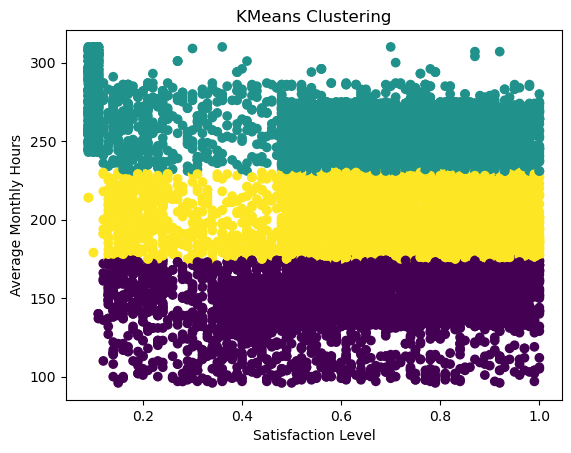

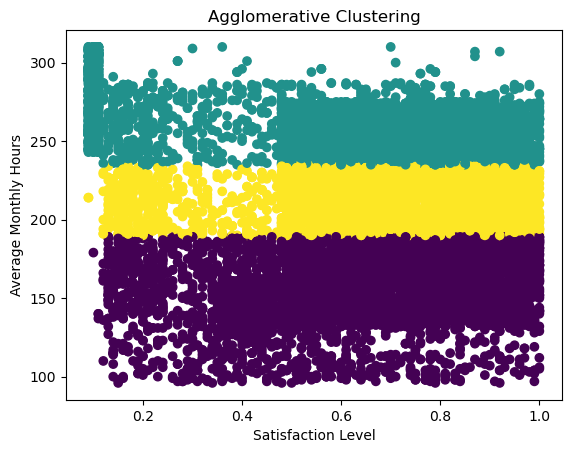

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

# Load the dataset
df = pd.read_csv("hr_data.csv")

# Keep necessary columns
df = df[["satisfaction_level", "average_montly_hours", "left"]]

# Use Elbow method to find optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
df["KMeans_cluster"] = kmeans.predict(df)

# Perform Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(df)
df["Agg_cluster"] = agg_cluster.fit_predict(df)

# Examine churn rate in each cluster
kmeans_churn_rate = df.groupby("KMeans_cluster")["left"].mean()
agg_churn_rate = df.groupby("Agg_cluster")["left"].mean()

print("KMeans Clustering - Churn Rate:")
print(kmeans_churn_rate)
print("\nAgglomerative Clustering - Churn Rate:")
print(agg_churn_rate)

# Plot different clusters in different colors
plt.scatter(df["satisfaction_level"], df["average_montly_hours"], c=df["KMeans_cluster"])
plt.title("KMeans Clustering")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.show()

plt.scatter(df["satisfaction_level"], df["average_montly_hours"], c=df["Agg_cluster"])
plt.title("Agglomerative Clustering")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.show()
